In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.utils.validation import column_or_1d
from sklearn.svm import SVR

## Load data

In [32]:
X = pd.read_csv("species_data.csv", sep=";").set_index("Sample", drop=True)
y = pd.read_csv("labels.csv", sep=";").set_index("Sample", drop=True)
X.shape, y.shape

((212, 479), (212, 1))

## Normalize

In [47]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X.shape
y = column_or_1d(y, warn=True)
y.shape

(212,)

## RFE with k-fold

In [83]:
min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(2)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=8,
)
rfecv.fit(X, y)
rfecv.support_
print(f"Optimal number of features: {rfecv.n_features_}")

## Plot the result with scoring function

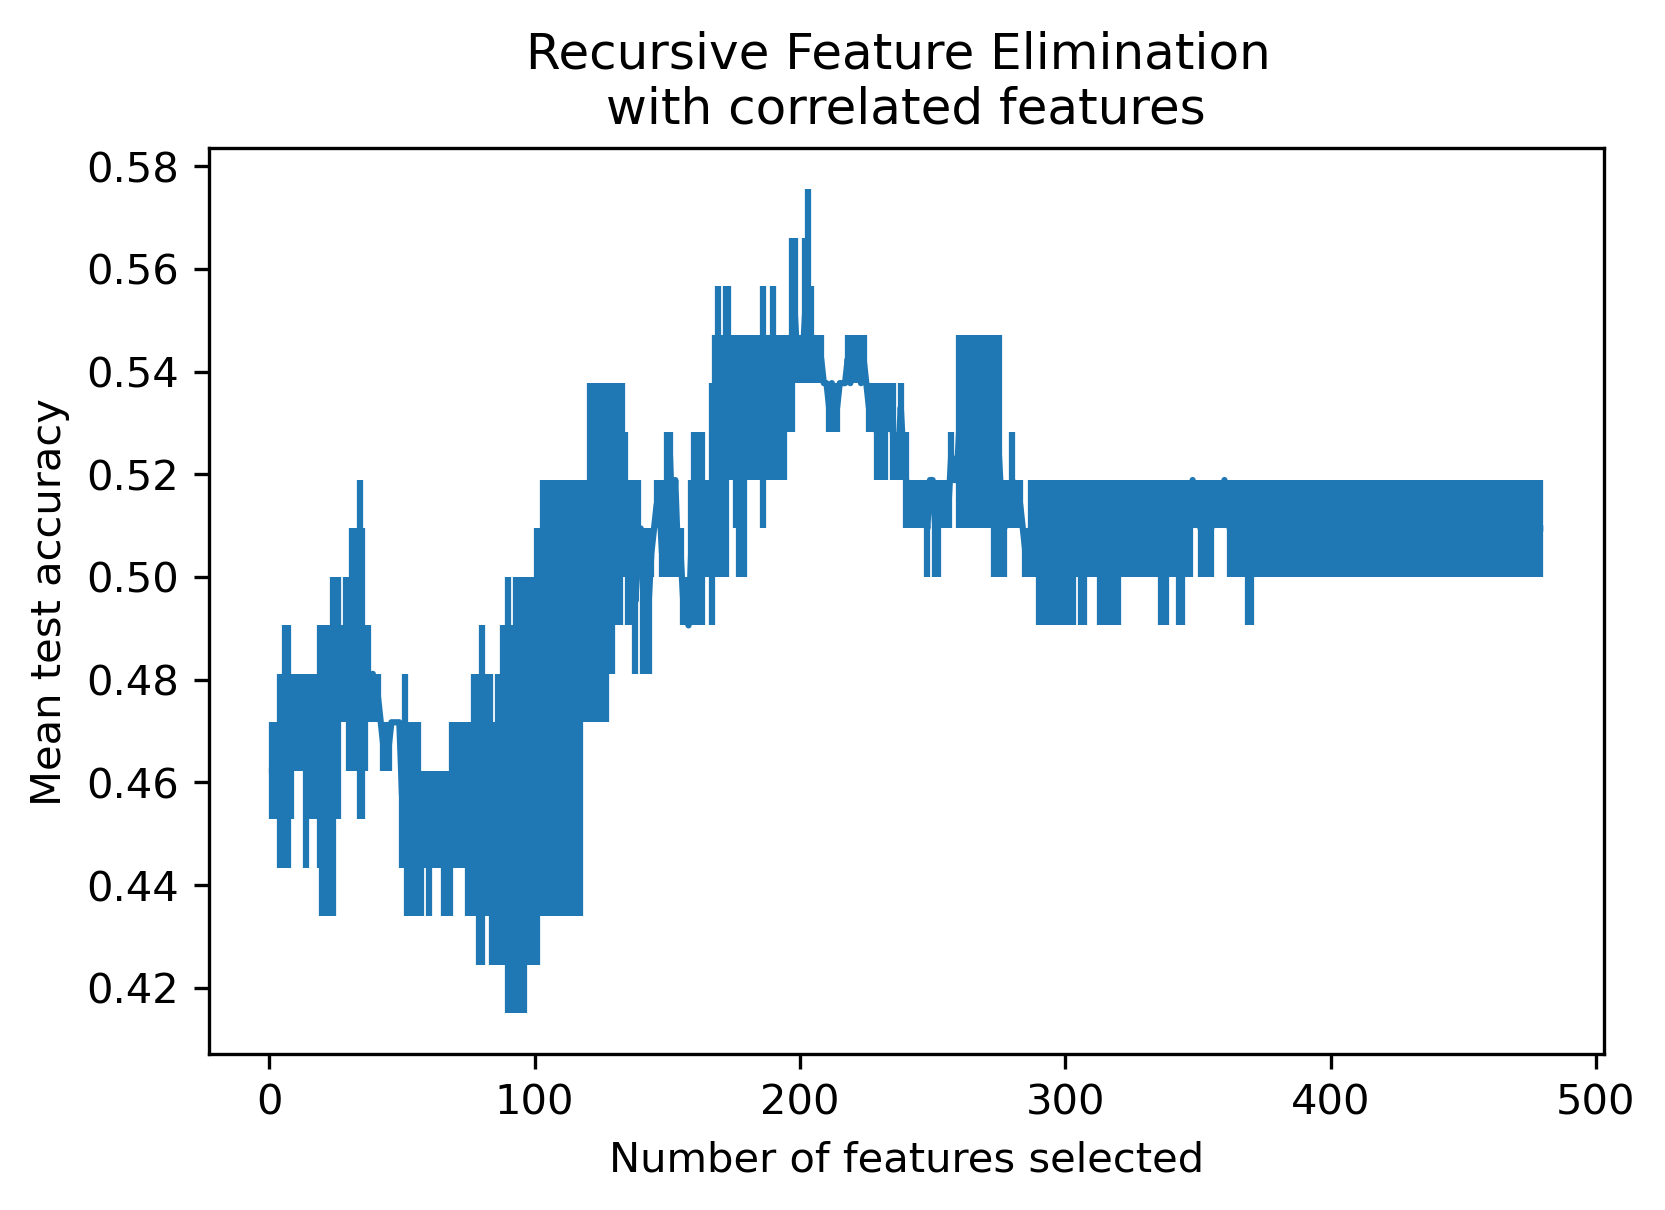

In [68]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure(dpi=300)
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()